In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [3]:
DF=pd.read_csv("FlightDataWebscrape.csv")

In [5]:
DF.head(10)

,Unnamed: 0,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,Air Asia,I5-764,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,Non Stop,"2,395"
1,1,Air Asia,I5-482,"Fri, Feb 11",New Delhi,Mumbai,2h 15m,Non Stop,"2,395"
2,2,SpiceJet,SG-8701,"Fri, Feb 11",New Delhi,Mumbai,2h 15m,Non Stop,"2,407"
3,3,SpiceJet,SG-8157,"Fri, Feb 11",New Delhi,Mumbai,2h 20m,Non Stop,"2,407"
4,4,Vistara,UK-927,"Fri, Feb 11",New Delhi,Mumbai,2h 05m,Non Stop,"2,410"
5,5,Vistara,UK-975,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
6,6,Vistara,UK-993,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
7,7,Vistara,UK-951,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
8,8,Vistara,UK-933,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
9,9,Vistara,UK-985,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"


In [6]:
DF.shape

(2403, 9)

#### checking for null values

In [7]:
DF.isnull().sum()

Unnamed: 0           0
Airline              0
Flight Number        0
Date of Departure    0
From                 0
To                   0
Duration             0
Total Stops          0
Price                0
dtype: int64

There are no null values in dataset.

#### Checking for blank spaces, random characters in each column

In [8]:
search =[" ","-",]

for c in DF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  0
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


There are no blank spaces, random characters  in columns of train dataset

### Dataframe Description:

Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

A Predictive Model is needed to be built using collected data to predict fares of flights.

Size of Data set: 2403 records

### FEATURES:

Airline: The name of the airline.

Flight Number: Number of Flight

Date of Departure: The date of the journey

From: The source from which the service begins.

To: The destination where the service ends.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

   
### Target / Label Column:
    
Price: The price of the ticket

 



#### Getting the basic summary and statistical information of the data.

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2403 non-null   int64 
 1   Airline            2403 non-null   object
 2   Flight Number      2403 non-null   object
 3   Date of Departure  2403 non-null   object
 4   From               2403 non-null   object
 5   To                 2403 non-null   object
 6   Duration           2403 non-null   object
 7   Total Stops        2403 non-null   object
 8   Price              2403 non-null   object
dtypes: int64(1), object(8)
memory usage: 169.1+ KB


In [10]:
DF.nunique() #the number of unique values in each column

Unnamed: 0           2403
Airline                 9
Flight Number        1158
Date of Departure      51
From                   23
To                     23
Duration              442
Total Stops             7
Price                 456
dtype: int64

####  Data Cleaning

In [11]:
DF['Total Stops'].value_counts()

1-stop       889
Non Stop     574
1 Stop       568
non-stop     215
2+-stop      129
2 Stop(s)     25
3 Stop(s)      3
Name: Total Stops, dtype: int64

In [12]:
DF['Total Stops'] = DF['Total Stops'].replace({'1 Stop':'1-stop','Non Stop':'non-stop','3 Stop(s)':'2+-stop'})

In [13]:
DF['Total Stops'].value_counts()

1-stop       1457
non-stop      789
2+-stop       132
2 Stop(s)      25
Name: Total Stops, dtype: int64

In [14]:
DF['Airline'].value_counts()

IndiGo       597
Vistara      470
Air India    462
GO FIRST     283
Indigo       176
SpiceJet     152
Go First     138
Air Asia     119
AirAsia        6
Name: Airline, dtype: int64

In [15]:
DF['Airline'] = DF['Airline'].replace({'Indigo':'IndiGo','AirAsia':'Air Asia','GO FIRST':'Go First'})

In [16]:
DF['Airline'].value_counts()

IndiGo       773
Vistara      470
Air India    462
Go First     421
SpiceJet     152
Air Asia     125
Name: Airline, dtype: int64

In [17]:
DF['From'].value_counts()

Delhi         737
Mumbai        535
Kolkata       261
New Delhi     220
Bangalore     150
Hyderabad     140
Goa            60
Guwahati       40
Chennai        40
Patna          30
Pune           30
Port Blair     30
Dehradun       20
Jaipur         20
Lucknow        10
Vijayawada     10
Bagdogra       10
Coimbatore     10
Kochi          10
Varanasi       10
Chandigarh     10
Tirupati       10
Ahmedabad      10
Name: From, dtype: int64

In [18]:
DF['From'] = DF['From'].replace({'Delhi':'New Delhi'})

In [19]:
DF['From'].value_counts()

New Delhi     957
Mumbai        535
Kolkata       261
Bangalore     150
Hyderabad     140
Goa            60
Guwahati       40
Chennai        40
Pune           30
Port Blair     30
Patna          30
Dehradun       20
Jaipur         20
Coimbatore     10
Ahmedabad      10
Bagdogra       10
Vijayawada     10
Lucknow        10
Varanasi       10
Chandigarh     10
Tirupati       10
Kochi          10
Name: From, dtype: int64

In [20]:
DF['To'].value_counts()

Bangalore     480
Mumbai        334
Kolkata       289
Goa           275
Delhi         255
New Delhi     240
Hyderabad     130
Patna          87
Pune           83
Chennai        40
Port Blair     30
Lucknow        20
Guwahati       20
Dehradun       20
Jaipur         20
Vijayawada     10
Bagdogra       10
Coimbatore     10
Kochi          10
Varanasi       10
Chandigarh     10
Tirupati       10
Ahmedabad      10
Name: To, dtype: int64

In [21]:
DF['To'] = DF['To'].replace({'Delhi':'New Delhi'})

In [22]:
DF['To'].value_counts()

New Delhi     495
Bangalore     480
Mumbai        334
Kolkata       289
Goa           275
Hyderabad     130
Patna          87
Pune           83
Chennai        40
Port Blair     30
Guwahati       20
Dehradun       20
Jaipur         20
Lucknow        20
Coimbatore     10
Ahmedabad      10
Bagdogra       10
Vijayawada     10
Varanasi       10
Chandigarh     10
Tirupati       10
Kochi          10
Name: To, dtype: int64

In [23]:
DF['Date of Departure'].value_counts()

Feb 01         409
Jan 31         280
Feb 02         218
Feb 03         162
Fri, Feb 11    150
Feb 06         111
Sat, Feb 12     60
Sun, Mar 6      60
Thu, Feb 10     60
Feb 05          53
Sun, Feb 13     50
Mon, Mar 28     50
Tue, Feb 8      40
Tue, Apr 5      40
Thu, Mar 10     40
Tue, Feb 22     40
Thu, Mar 24     30
Fri, Apr 8      30
Sat, Apr 2      30
Wed, Feb 23     30
Wed, Mar 2      30
Sat, Feb 26     30
Tue, Mar 1      20
Fri, Feb 25     20
Sun, Mar 13     20
Mon, Feb 14     20
Sat, Feb 19     20
Thu, Feb 17     20
Sun, Mar 27     20
Thu, Mar 17     20
Sat, Mar 12     20
Fri, Mar 25     20
Tue, Mar 8      20
Thu, Apr 7      10
Tue, Apr 26     10
Sun, Feb 27     10
Thu, Feb 24     10
Fri, Apr 1      10
Tue, Feb 15     10
Mon, Apr 11     10
Fri, Mar 4      10
Fri, Mar 18     10
Mon, Mar 7      10
Wed, Feb 9      10
Tue, Mar 22     10
Wed, Mar 16     10
Fri, Mar 11     10
Thu, Mar 31     10
Mon, Feb 28     10
Sun, Apr 3      10
Mon, Feb 21     10
Name: Date of Departure, dtype:

In [24]:
DF['Date of Departure'] = DF['Date of Departure'].replace({'Feb 01':'Thu, Feb 1','Feb 03':'Thur, Feb 3','Feb 02':'Thur, Feb 3','Jan 31':'Mon, Jan 31','Feb 05':'Sat, Feb 5','Feb 06':'Sun, Feb 6'})

In [25]:
DF['Date of Departure'].value_counts()

Thu, Feb 1     409
Thur, Feb 3    380
Mon, Jan 31    280
Fri, Feb 11    150
Sun, Feb 6     111
Sat, Feb 12     60
Thu, Feb 10     60
Sun, Mar 6      60
Sat, Feb 5      53
Mon, Mar 28     50
Sun, Feb 13     50
Tue, Feb 8      40
Tue, Feb 22     40
Thu, Mar 10     40
Tue, Apr 5      40
Fri, Apr 8      30
Sat, Apr 2      30
Thu, Mar 24     30
Wed, Feb 23     30
Wed, Mar 2      30
Sat, Feb 26     30
Tue, Mar 1      20
Sun, Mar 13     20
Fri, Feb 25     20
Thu, Feb 17     20
Sun, Mar 27     20
Sat, Feb 19     20
Thu, Mar 17     20
Sat, Mar 12     20
Tue, Mar 8      20
Fri, Mar 25     20
Mon, Feb 14     20
Thu, Apr 7      10
Sun, Feb 27     10
Wed, Feb 9      10
Sun, Apr 3      10
Mon, Feb 28     10
Thu, Mar 31     10
Fri, Mar 11     10
Wed, Mar 16     10
Tue, Mar 22     10
Mon, Mar 7      10
Thu, Feb 24     10
Fri, Mar 18     10
Fri, Mar 4      10
Mon, Apr 11     10
Tue, Apr 26     10
Tue, Feb 15     10
Fri, Apr 1      10
Mon, Feb 21     10
Name: Date of Departure, dtype: int64

#### Converting values in Column 'Price' to int64 datatype

Converting Pandas column into a list, removing the ',' from the values, reattaching to Original Pandas Dataframe and then converting to int64 datatype

In [26]:
price = DF['Price'].tolist() 

In [27]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [28]:
df = pd.DataFrame({'Price':Price})

In [29]:
df.index = DF.index

In [30]:
DF['Price'] = df['Price']

In [31]:
DF['Price'] = DF['Price'].astype('int64')

#### Dropping column Unnamed: 0 since it is not required for building the predictive model

In [32]:
DF.drop(columns=['Unnamed: 0'],inplace = True)

In [33]:
DF.reset_index(drop=True,inplace = True)

### Feature Engineering

##### Creating New columns "Day", "Date","Month" from Column 'Date of Departure'

In [34]:
DateDept = DF['Date of Departure'].tolist() 

In [35]:
Day=[]
date = []
Month = []
Date = []

In [36]:
for d in DateDept:
    Day.append(d.split(",")[0])
    date.append(d.split(",")[1])

In [37]:
for d in date:
    Date.append(d.split(" ")[2])
    Month.append(d.split(" ")[1])

In [38]:
df2 = pd.DataFrame({'Day':Day, 'Date':Date,'Month': Month})

In [39]:
df2.index = DF.index

In [40]:
DF[['Day','Date','Month']] = df2[['Day','Date','Month']]

In [41]:
DF['Day'].unique()

array(['Fri', 'Sun', 'Sat', 'Wed', 'Mon', 'Tue', 'Thu', 'Thur'],
      dtype=object)

In [43]:
DF['Day']=DF['Day'].replace({'Thur':'Thu'})

In [44]:
DF['Day'].unique()

array(['Fri', 'Sun', 'Sat', 'Wed', 'Mon', 'Tue', 'Thu'], dtype=object)

In [45]:
DF['Month'].unique()

array(['Feb', 'Mar', 'Apr', 'Jan'], dtype=object)

In [46]:
DF['Date'].unique()

array(['11', '13', '2', '28', '22', '5', '14', '31', '26', '27', '10',
       '25', '7', '12', '21', '8', '1', '6', '16', '4', '24', '3', '19',
       '23', '17', '18', '9', '15'], dtype=object)

In [47]:
DF['Duration'].unique()

array(['2h 10m', '2h 15m', '2h 20m', '2h 05m', '7h 10m', '5h 50m',
       '6h 25m', '7h 45m', '7h 55m', '9h 00m', '8h 25m', '9h 05m',
       '2h 55m', '2h 45m', '2h 50m', '5h 55m', '9h 25m', '9h 30m',
       '5h 15m', '6h 30m', '8h 55m', '5h 05m', '5h 30m', '8h 00m',
       '8h 30m', '2h 40m', '4h 55m', '9h 35m', '4h 45m', '5h 00m',
       '5h 45m', '6h 00m', '7h 00m', '8h 35m', '8h 45m', '9h 50m',
       '15h 05m', '11h 35m', '22h 25m', '26h 10m', '15h 50m', '18h 05m',
       '28h 05m', '11h 45m', '16h 00m', '3h 35m', '1h 35m', '1h 30m',
       '1h 40m', '1h 45m', '2h 00m', '2h 35m', '2h 25m', '3h 55m',
       '6h 50m', '11h 40m', '18h 45m', '23h 35m', '6h 20m', '7h 05m',
       '9h 40m', '10h 45m', '11h 10m', '4h 15m', '4h 20m', '6h 15m',
       '1h 55m', '1h 20m', '1h 00m', '1h 10m', '1h 25m', '6h 35m',
       '6h 45m', '6h 55m', '8h 40m', '10h 10m', '12h 30m', '13h 35m',
       '14h 45m', '15h 00m', '8h 20m', '1h 50m', '3h 05m', '7h 35m',
       '5h 10m', '5h 25m', '9h 10m', '4h 25

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

#### Converting the values in Duration column to minutes

In [48]:
DF['Duration']

0        2h 10m
1        2h 15m
2        2h 15m
3        2h 20m
4        2h 05m
         ...   
2398    11h 50m
2399    21h 10m
2400    23h 20m
2401    24h 20m
2402    25h 40m
Name: Duration, Length: 2403, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [49]:
duration = DF['Duration'].tolist() #creating a list with values from colum 'Duration'

In [50]:
duration

['2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '7h 10m',
 '5h 50m',
 '6h 25m',
 '7h 45m',
 '7h 55m',
 '9h 00m',
 '6h 25m',
 '7h 55m',
 '8h 25m',
 '9h 05m',
 '2h 55m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 50m',
 '2h 55m',
 '2h 55m',
 '5h 55m',
 '9h 25m',
 '9h 30m',
 '5h 15m',
 '6h 30m',
 '7h 55m',
 '8h 55m',
 '5h 05m',
 '5h 30m',
 '6h 25m',
 '8h 00m',
 '8h 30m',
 '2h 40m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 20m',
 '4h 55m',
 '9h 35m',
 '4h 45m',
 '5h 00m',
 '5h 45m',
 '6h 00m',
 '7h 00m',
 '8h 35m',
 '8h 45m',
 '9h 50m',
 '15h 05m',
 '11h 35m',
 '22h 25m',
 '26h 10m',
 '15h 50m',
 '18h 05m',
 '28h 05m',
 '11h 45m',
 '16h 00m',
 '3h 35m',
 '1h 35m',
 '1h 30m',
 '1h 30m',
 '1h 35m',
 '1h 35m',
 '1h 40m',
 '1h 40m',
 '1h 45m',
 '1h 45m',
 '9h 25m',
 '2h 20m',
 '2h 20m',
 '2h 00m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 35m',
 '2h 00m',
 

In [51]:
# replacing 'h' with *60, whitespace with "+",removing "m" and removing leading zeroes from the decimal integer literals since they aren't allowed in python """

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 


In [52]:
duration

['2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+20',
 '2*60+5',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '7*60+10',
 '5*60+50',
 '6*60+25',
 '7*60+45',
 '7*60+55',
 '9*60+0',
 '6*60+25',
 '7*60+55',
 '8*60+25',
 '9*60+5',
 '2*60+55',
 '2*60+45',
 '2*60+50',
 '2*60+50',
 '2*60+50',
 '2*60+55',
 '2*60+55',
 '5*60+55',
 '9*60+25',
 '9*60+30',
 '5*60+15',
 '6*60+30',
 '7*60+55',
 '8*60+55',
 '5*60+5',
 '5*60+30',
 '6*60+25',
 '8*60+0',
 '8*60+30',
 '2*60+40',
 '2*60+5',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '2*60+20',
 '2*60+20',
 '4*60+55',
 '9*60+35',
 '4*60+45',
 '5*60+0',
 '5*60+45',
 '6*60+0',
 '7*60+0',
 '8*60+35',
 '8*60+45',
 '9*60+50',
 '15*60+5',
 '11*60+35',
 '22*60+25',
 '26*60+10',
 '15*60+50',
 '18*60+5',
 '28*60+5',
 '11*60+45',
 '16*60+0',
 '3*60+35',
 '1*60+35',
 '1*60+30',
 '1*60+30',
 '1*60+35',
 '1*60+35',
 '1*60+40',
 '1*60+40',
 '1*60+45',
 '1*60+45',
 '9*60+25',
 '2*60+20',
 '2*60+20',
 '2*60+0',
 '2*60+5'

In [53]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [54]:
len(duration)

2403

##### Adding Duration(mins) column to fDF dataframe.

In [55]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [56]:
dur_df.index = DF.index

In [57]:
DF['Duration(mins)'] = dur_df['Duration(mins)']

In [58]:
DF

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Fri, Feb 11",New Delhi,Mumbai,2h 10m,non-stop,2395,Fri,11,Feb,130
1,Air Asia,I5-482,"Fri, Feb 11",New Delhi,Mumbai,2h 15m,non-stop,2395,Fri,11,Feb,135
2,SpiceJet,SG-8701,"Fri, Feb 11",New Delhi,Mumbai,2h 15m,non-stop,2407,Fri,11,Feb,135
3,SpiceJet,SG-8157,"Fri, Feb 11",New Delhi,Mumbai,2h 20m,non-stop,2407,Fri,11,Feb,140
4,Vistara,UK-927,"Fri, Feb 11",New Delhi,Mumbai,2h 05m,non-stop,2410,Fri,11,Feb,125
...,...,...,...,...,...,...,...,...,...,...,...,...
2398,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,11h 50m,2+-stop,16401,Thu,3,Feb,710
2399,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,21h 10m,2+-stop,16401,Thu,3,Feb,1270
2400,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,23h 20m,2+-stop,16401,Thu,3,Feb,1400
2401,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,24h 20m,2+-stop,16401,Thu,3,Feb,1460


Dropping the original duration column

In [59]:
DF.drop(columns = ['Duration'],inplace=True)

In [60]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2403 non-null   object
 1   Flight Number      2403 non-null   object
 2   Date of Departure  2403 non-null   object
 3   From               2403 non-null   object
 4   To                 2403 non-null   object
 5   Total Stops        2403 non-null   object
 6   Price              2403 non-null   int64 
 7   Day                2403 non-null   object
 8   Date               2403 non-null   object
 9   Month              2403 non-null   object
 10  Duration(mins)     2403 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 206.6+ KB


In [61]:
#converting values in'Day' to int64 datatype
DF['Date'] = DF['Date'].astype('int64')

#### Getting the basic Statistical information about int64 datatype columns

In [62]:
DF.describe()

,Price,Date,Duration(mins)
count,2403.000000,2403.000000,2403.000000
mean,6511.873908,11.344153,540.792759
std,4267.895527,10.463218,470.149017
min,925.000000,1.000000,55.000000
25%,2690.000000,3.000000,140.000000
50%,5942.000000,8.000000,425.000000
75%,9840.000000,19.000000,720.000000
max,23757.000000,31.000000,3070.000000


A higher max value that 75% in the columns indicates the presence of outliers

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

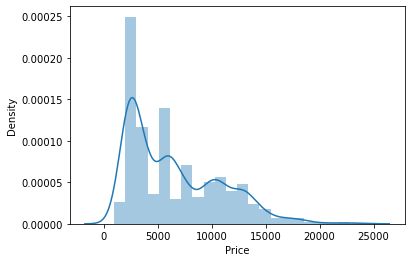

In [63]:
sns.distplot(DF.Price)

Distribution is skewed and tails of from 15000 mark.

In [64]:
DF.Price.skew()

0.8752606616731883

From the graph above it is observed that the Price data forms a continuous distribution with mean of 6511.87 and tails off from 15000 mark.

#### Analyzing the Feature Columns

In [65]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

Airline              object
Flight Number        object
Date of Departure    object
From                 object
To                   object
Total Stops          object
Day                  object
Month                object
dtype: object

In [66]:
DF['Airline'].value_counts()

IndiGo       773
Vistara      470
Air India    462
Go First     421
SpiceJet     152
Air Asia     125
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

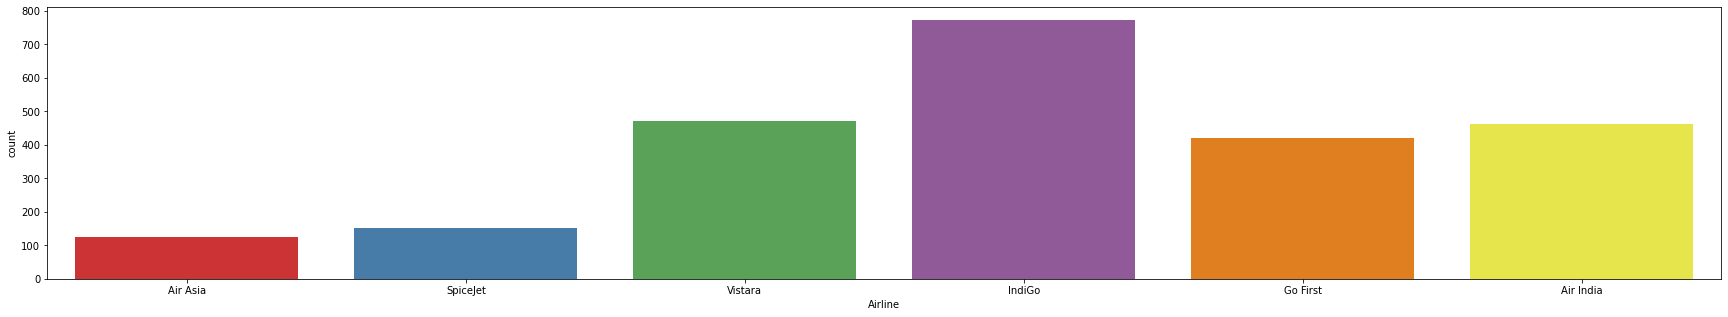

In [67]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Airline'], palette="Set1")

IndiGo has the highest number of flights followed by Vistara and Air India

<AxesSubplot:xlabel='count', ylabel='From'>

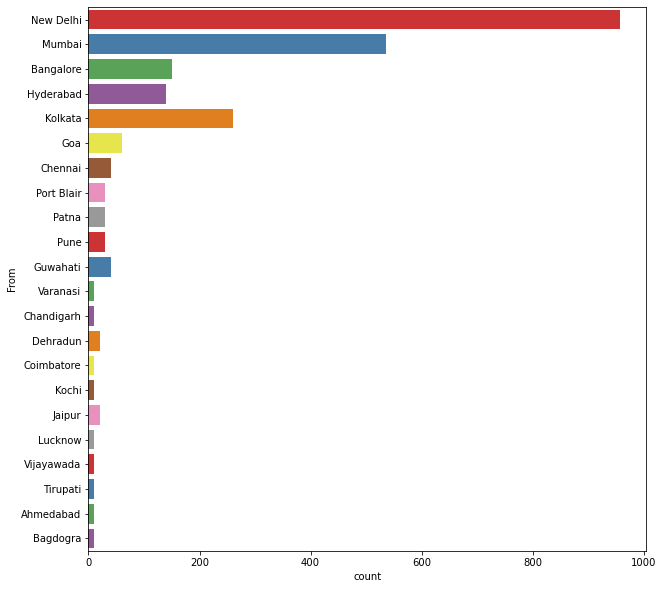

In [68]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=DF['From'], palette="Set1")

Highest number of flights are from Delhi followed by Mumbai, Kolkata,Bangalore and Hyderabad

<AxesSubplot:xlabel='count', ylabel='To'>

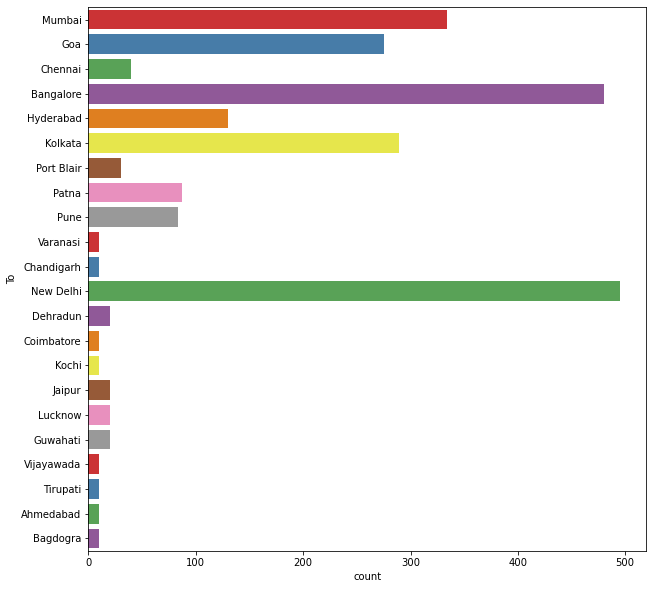

In [69]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=DF['To'], palette="Set1")

New Delhi is the most popular destination followed by Bangalore, Mumbai, Kolkata and Goa

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

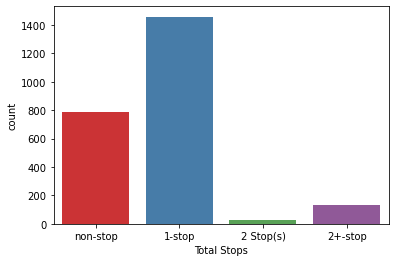

In [70]:
sns.countplot(DF['Total Stops'], palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing Relationship between Day, Month columns and Price

Text(0.5, 1.0, 'Price Trend')

<Figure size 1440x3024 with 0 Axes>

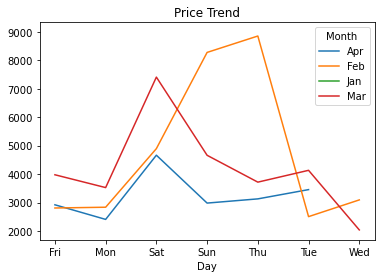

In [72]:
plt.figure(figsize=(20,42))
DF.groupby(['Day','Month']).mean()['Price'].unstack().plot()
plt.title('Price Trend')

<AxesSubplot:xlabel='Day', ylabel='Price'>

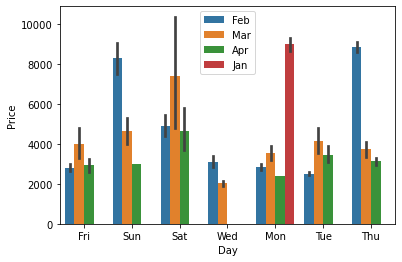

In [73]:
sns.barplot(DF['Day'],DF['Price'],hue=Month)

From above graphs it can be observed that on an average, there is a steady decline in Flight price from January to April, with the prices being lowest in March.

Flight Ticket prices are the highest on Thursdays,Mondays and during the Weekend on an average.

#### Analyzing Relationship between Airlines and Price

Text(0.5, 1.0, 'Price Trend')

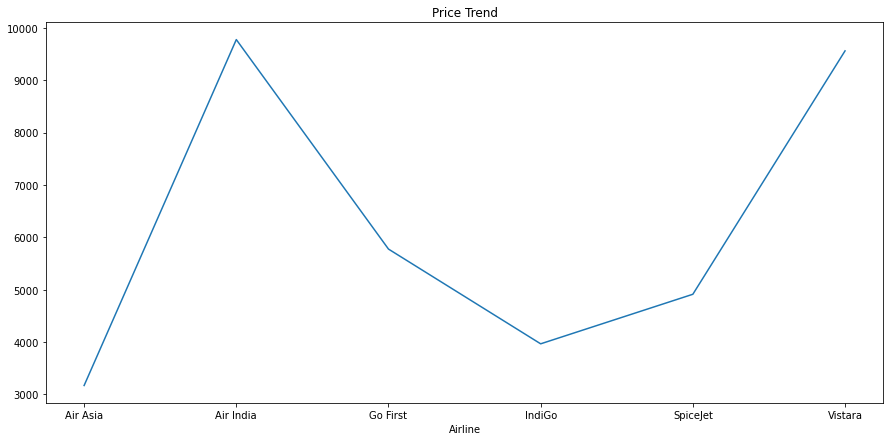

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
DF.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')

#Airlines vs Price

Text(0.5, 1.0, 'Price Trend')

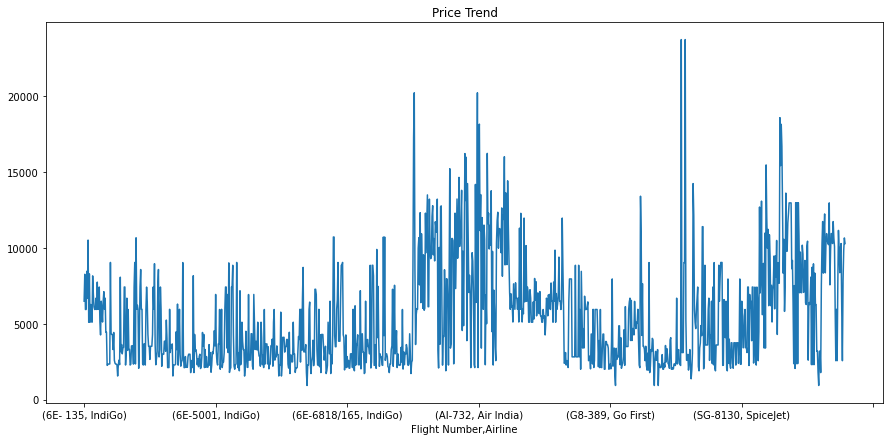

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
DF.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')

# Flight numbers vs Price

Air Asia, IndiGo and SpiceJet offer air tickets at the most affordable prices on average, whereas Vistara, Air India are the most expensive on average.

Text(0.5, 1.0, 'Price Trend')

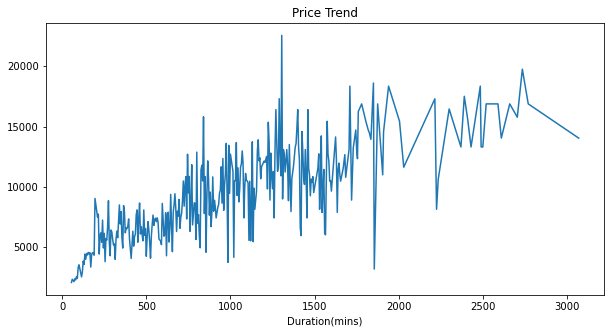

In [76]:
plt.figure(figsize=(10,5))
DF.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Duration vs Stops')

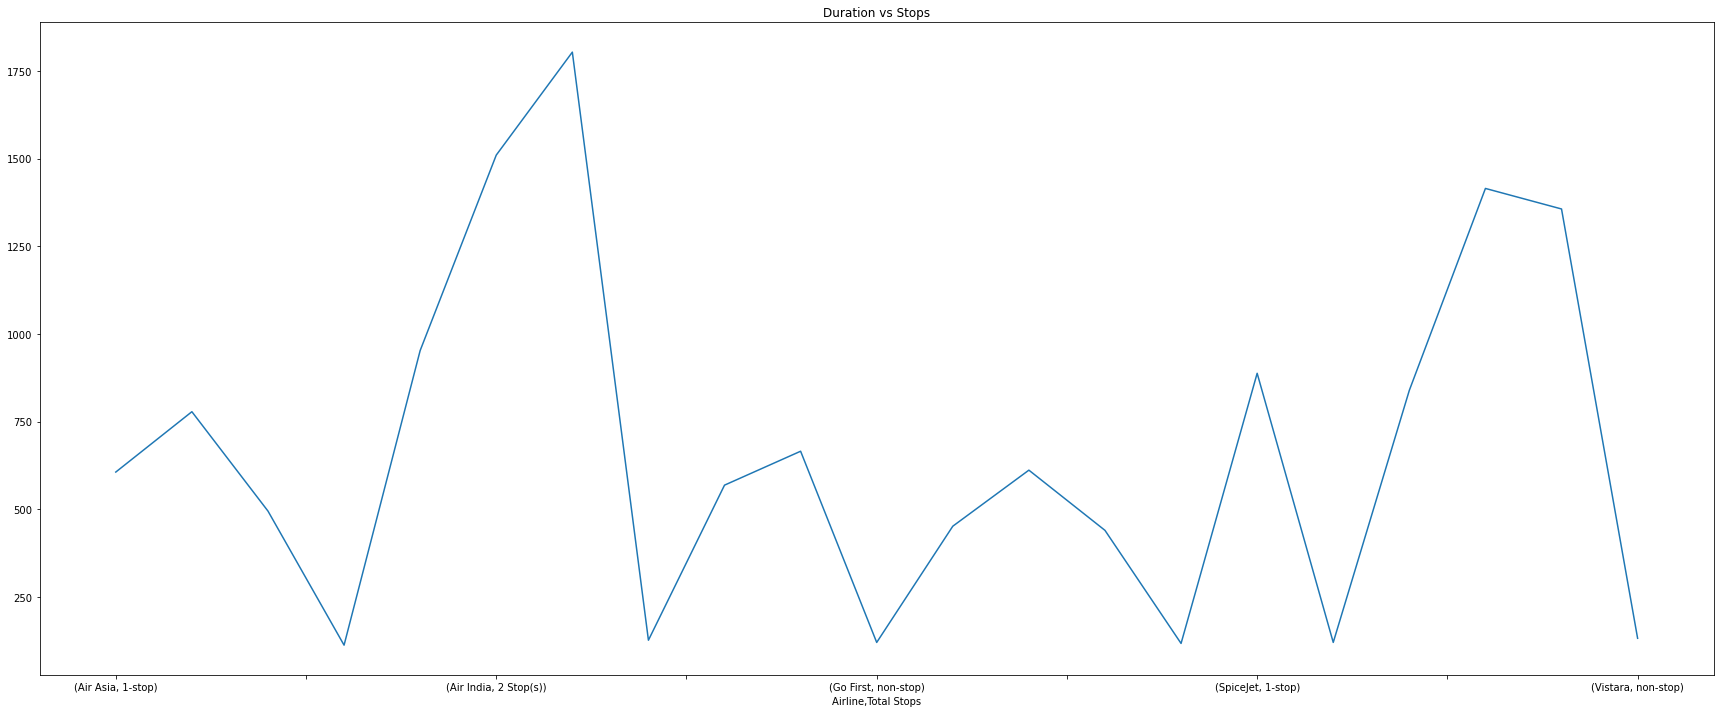

In [77]:
plt.figure(figsize=(30,12))
DF.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

It can be observed that Number of Stops impact the travel time of Airlines

Text(0.5, 1.0, 'Price vs Stops')

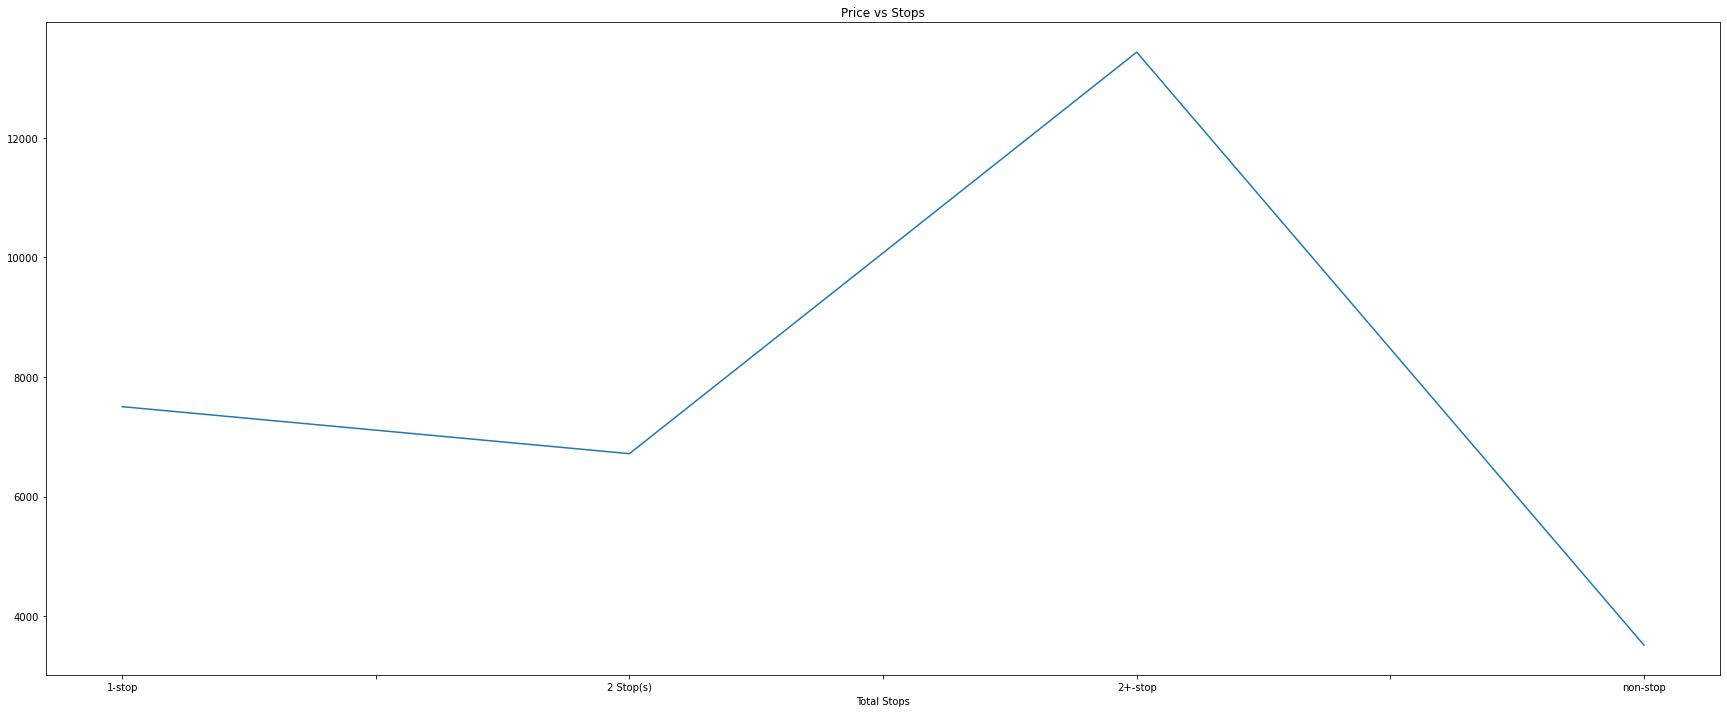

In [78]:
plt.figure(figsize=(30,12))
DF.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines

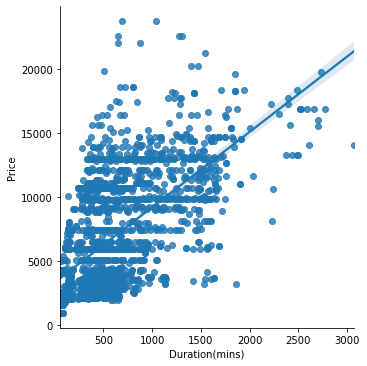

In [79]:
sns.lmplot(x="Duration(mins)", y="Price", data=DF)

There is a linear relationship between Price and flight duration.

<AxesSubplot:xlabel='To', ylabel='Price'>

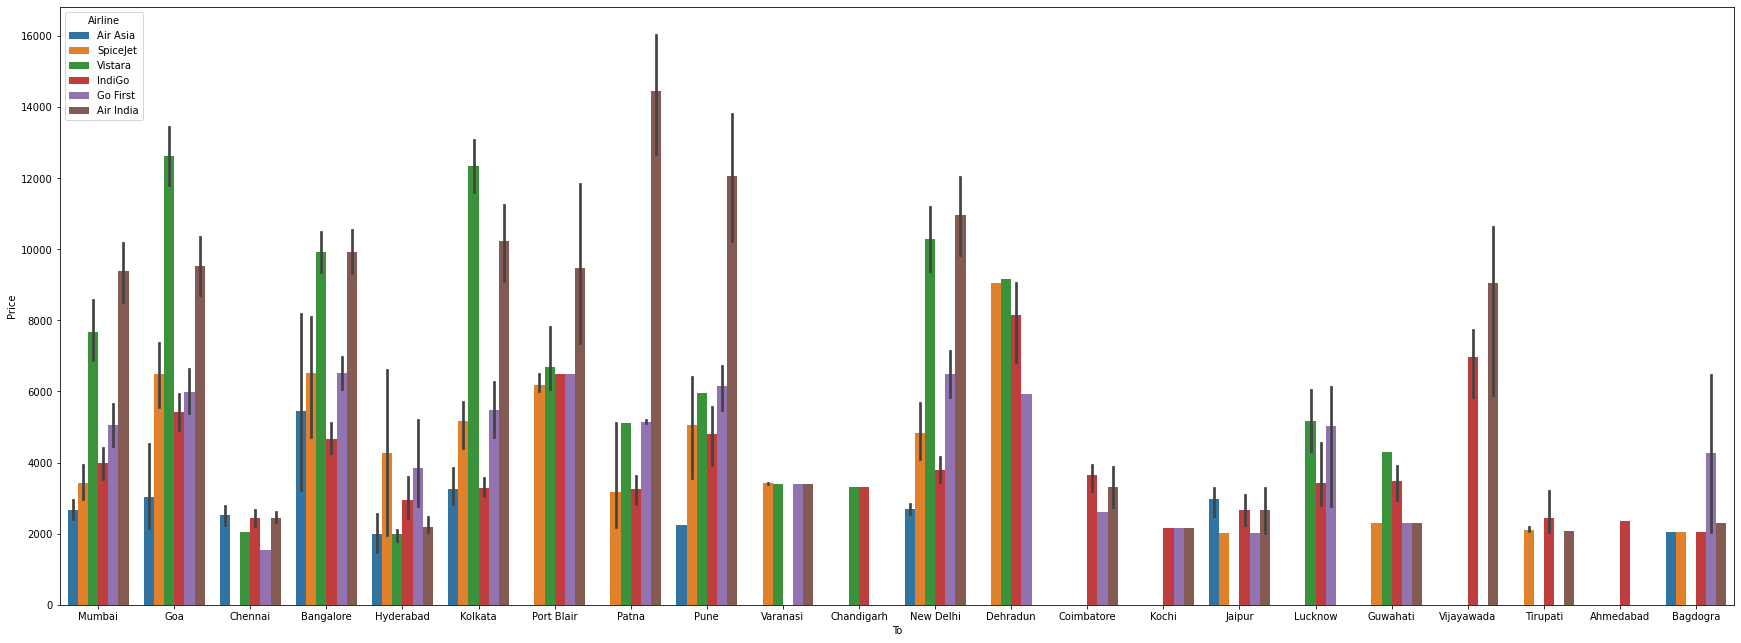

In [80]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(DF['To'],DF['Price'],hue=DF['Airline'])

Goa,Mumbai,Pune,Bangalore,Kolakata,Port Blair,New Delhi are the most expensive destinations while,Kochi, Coimbatore,Jammu,Chennai,Hyderabad,Indore,Tirupati are the most affordable destinations

Indigo,Air Asia and Spicejet provide most affordable Airtickets to the destinations

### Checking for Outliers in continuous data type Features.

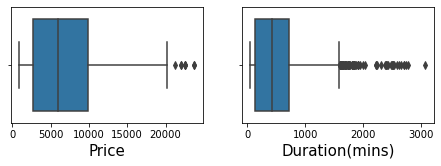

In [81]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in DF[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

#### Removing Outliers using Z score Method

In [82]:
df2 =DF[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [83]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [84]:
df3.shape

(2378, 1)

In [85]:
df2.shape

(2403, 1)

##### Data loss %:

In [86]:
loss=(2403-2378)/2403 * 100
loss

1.0403662089055348

1% Data loss is within acceptable range

#### Using Z score method to reduce outliers since it has a low data loss %

In [87]:
dropindx = DF.index.difference(df3.index)

In [88]:
dropindx

Int64Index([ 379,  920, 1792, 1908, 1909, 1913, 1914, 1915, 1916, 1920, 1921,
            1922, 1923, 1924, 1925, 1927, 1928, 1933, 1936, 1937, 2114, 2115,
            2116, 2117, 2232],
           dtype='int64')

In [89]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [90]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [91]:
DF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2395,Fri,11,Feb,130
1,Air Asia,I5-482,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2395,Fri,11,Feb,135
2,SpiceJet,SG-8701,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2407,Fri,11,Feb,135
3,SpiceJet,SG-8157,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2407,Fri,11,Feb,140
4,Vistara,UK-927,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2410,Fri,11,Feb,125
...,...,...,...,...,...,...,...,...,...,...,...
2373,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,710
2374,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,1270
2375,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,1400
2376,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,1460


<AxesSubplot:xlabel='Duration(mins)'>

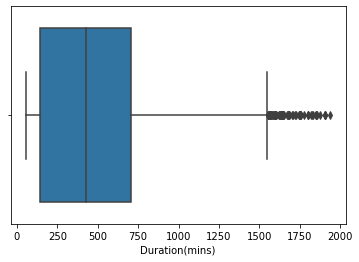

In [92]:
sns.boxplot(DF['Duration(mins)'])

A lot of outliers have been removed.

### Checking for skewness in data distributions

In [93]:
DF['Duration(mins)'].skew()

1.1456352941613381

#### Normalizing Data Distribution using PowerTransformer

In [94]:
from sklearn.preprocessing import PowerTransformer

In [95]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [96]:
df4 = DF[['Duration(mins)']]

In [97]:
transformed= powtrans.fit_transform(df4)

In [98]:
type(transformed)

numpy.ndarray

In [99]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [100]:
transformed.skew()

Duration(mins)   -0.03432
dtype: float64

In [101]:
transformed.index = DF.index

In [102]:
DF[['Duration(mins)']] = transformed[['Duration(mins)']]

In [103]:
DF['Duration(mins)'].skew()

-0.03431960049876891

A lot of skewness has been removed.

### Encoding Categorical Columns

####  Encoding using get_dummies()

In [104]:
DF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2395,Fri,11,Feb,-1.112940
1,Air Asia,I5-482,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2395,Fri,11,Feb,-1.075442
2,SpiceJet,SG-8701,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2407,Fri,11,Feb,-1.075442
3,SpiceJet,SG-8157,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2407,Fri,11,Feb,-1.039161
4,Vistara,UK-927,"Fri, Feb 11",New Delhi,Mumbai,non-stop,2410,Fri,11,Feb,-1.151747
...,...,...,...,...,...,...,...,...,...,...,...
2373,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,0.731719
2374,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,1.442279
2375,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,1.565576
2376,Vistara,UK-655,"Thur, Feb 3",Mumbai,Bangalore,2+-stop,16401,Thu,3,Feb,1.619048


In [105]:
dumm = pd.get_dummies(DF[['Airline','Total Stops','Day','Month']],drop_first = False)

In [106]:
dumm

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1-stop,Total Stops_2 Stop(s),Total Stops_2+-stop,Total Stops_non-stop,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2374,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2375,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2376,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [107]:
DF = DF.join(dumm)

In [108]:
DF.drop(columns = ['Airline','Flight Number','Total Stops','Day','Month'],inplace=True) #Dropping the columns since they are no longer needed

In [109]:
DF

,Date of Departure,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,"Fri, Feb 11",New Delhi,Mumbai,2395,11,-1.112940,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"Fri, Feb 11",New Delhi,Mumbai,2395,11,-1.075442,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"Fri, Feb 11",New Delhi,Mumbai,2407,11,-1.075442,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"Fri, Feb 11",New Delhi,Mumbai,2407,11,-1.039161,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,"Fri, Feb 11",New Delhi,Mumbai,2410,11,-1.151747,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,"Thur, Feb 3",Mumbai,Bangalore,16401,3,0.731719,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2374,"Thur, Feb 3",Mumbai,Bangalore,16401,3,1.442279,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2375,"Thur, Feb 3",Mumbai,Bangalore,16401,3,1.565576,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2376,"Thur, Feb 3",Mumbai,Bangalore,16401,3,1.619048,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [110]:
DF.drop(columns = ['Date of Departure'],inplace=True) #dropping 'Date of Departure' column since it is no longer needed

In [111]:
DF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,New Delhi,Mumbai,2395,11,-1.112940,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,New Delhi,Mumbai,2395,11,-1.075442,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,New Delhi,Mumbai,2407,11,-1.075442,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,New Delhi,Mumbai,2407,11,-1.039161,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,New Delhi,Mumbai,2410,11,-1.151747,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,Mumbai,Bangalore,16401,3,0.731719,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2374,Mumbai,Bangalore,16401,3,1.442279,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2375,Mumbai,Bangalore,16401,3,1.565576,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2376,Mumbai,Bangalore,16401,3,1.619048,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#### Encoding Columns 'From' and 'To' using Label Encoder

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
labenc = LabelEncoder()

In [114]:
for col in DF[['From','To']]:
    DF[col] = labenc.fit_transform(DF[col])

In [115]:
DF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,15,14,2395,11,-1.112940,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15,14,2395,11,-1.075442,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,14,2407,11,-1.075442,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,15,14,2407,11,-1.039161,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,15,14,2410,11,-1.151747,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,14,2,16401,3,0.731719,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2374,14,2,16401,3,1.442279,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2375,14,2,16401,3,1.565576,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2376,14,2,16401,3,1.619048,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Finding Correlation 

In [116]:
f_corr =DF.corr()

In [117]:
f_corr

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
From,1.000000,-0.136685,0.341912,-0.118886,0.202624,-0.186771,0.155955,0.043617,-0.203750,0.016015,...,0.141253,-0.078436,-0.097897,0.184178,0.058757,-0.156854,-0.084652,0.095413,0.172331,-0.211897
To,-0.136685,1.000000,-0.041298,0.152735,-0.073642,-0.025369,0.010230,0.045500,-0.051331,0.106217,...,0.074264,0.152976,0.103246,-0.252291,0.076741,0.048384,-0.021618,-0.024666,0.059957,-0.005960
Price,0.341912,-0.041298,1.000000,-0.209299,0.633768,-0.183048,0.346926,-0.071524,-0.407239,-0.094215,...,0.097989,-0.110551,0.030565,0.338466,-0.230068,-0.171879,-0.186639,0.156942,0.223940,-0.268041
Date,-0.118886,0.152735,-0.209299,1.000000,-0.066469,0.008198,-0.070807,-0.005343,0.123836,0.061672,...,0.712385,0.006074,-0.054115,-0.536153,0.006853,0.018826,-0.120514,-0.506738,0.682423,0.136438
Duration(mins),0.202624,-0.073642,0.633768,-0.066469,1.000000,-0.145551,0.242271,-0.023995,-0.237008,-0.011871,...,0.118535,-0.066855,0.043237,0.166053,-0.169815,-0.114520,-0.112946,0.085293,0.142451,-0.155900
Airline_Air Asia,-0.186771,-0.025369,-0.183048,0.008198,-0.145551,1.000000,-0.111921,-0.109250,-0.163466,-0.061551,...,-0.058526,0.000443,-0.015892,-0.065329,0.111920,0.029208,0.079060,-0.060681,-0.080203,0.093851
Airline_Air India,0.155955,0.010230,0.346926,-0.070807,0.242271,-0.111921,1.000000,-0.220385,-0.329753,-0.124164,...,0.026856,-0.001195,-0.008659,0.104070,-0.059405,-0.034506,-0.051228,0.057054,0.075486,-0.103005
Airline_Go First,0.043617,0.045500,-0.071524,-0.005343,-0.023995,-0.109250,-0.220385,1.000000,-0.321883,-0.121201,...,-0.012036,-0.050009,0.035648,0.096592,-0.046679,-0.031548,-0.056274,0.064698,0.032230,-0.072811
Airline_IndiGo,-0.203750,-0.051331,-0.407239,0.123836,-0.237008,-0.163466,-0.329753,-0.321883,1.000000,-0.181347,...,-0.018850,0.106096,0.019449,-0.244091,0.074891,0.099560,0.079891,-0.111234,-0.119826,0.190399
Airline_SpiceJet,0.016015,0.106217,-0.094215,0.061672,-0.011871,-0.061551,-0.124164,-0.121201,-0.181347,1.000000,...,0.009618,0.028629,0.032551,-0.059689,0.043978,-0.029687,0.024658,-0.096175,0.037885,0.073181


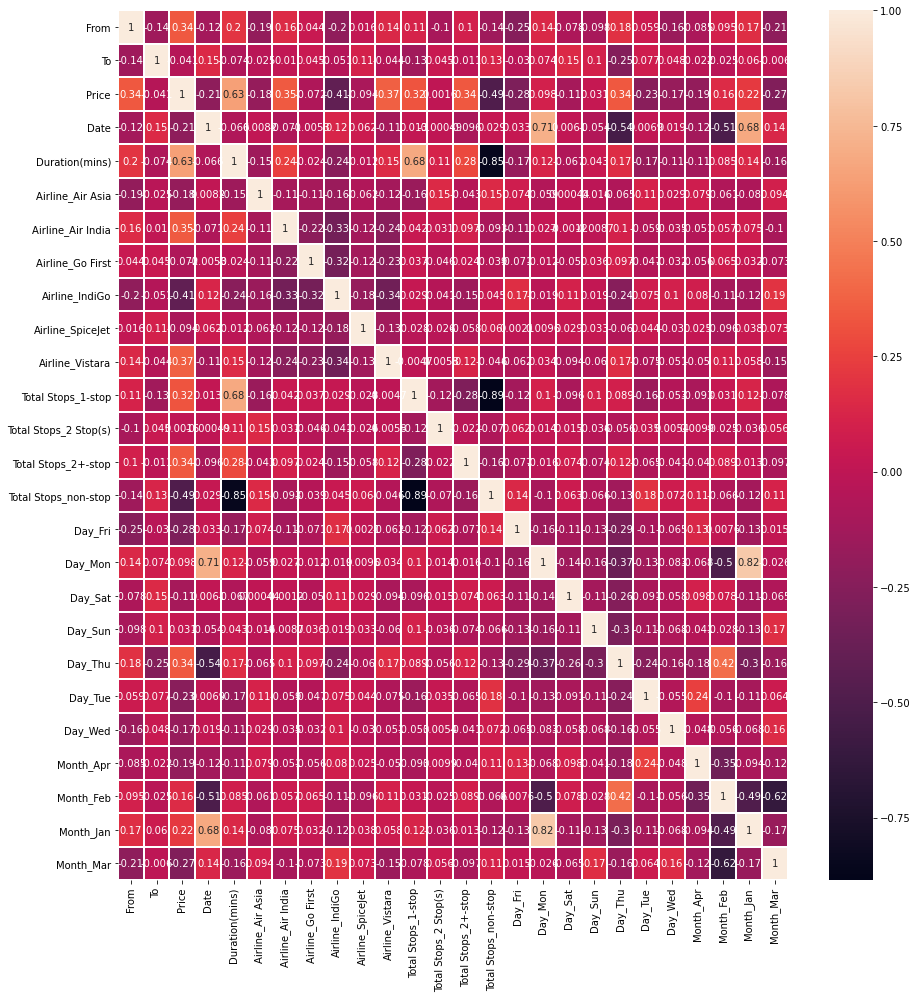

In [118]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

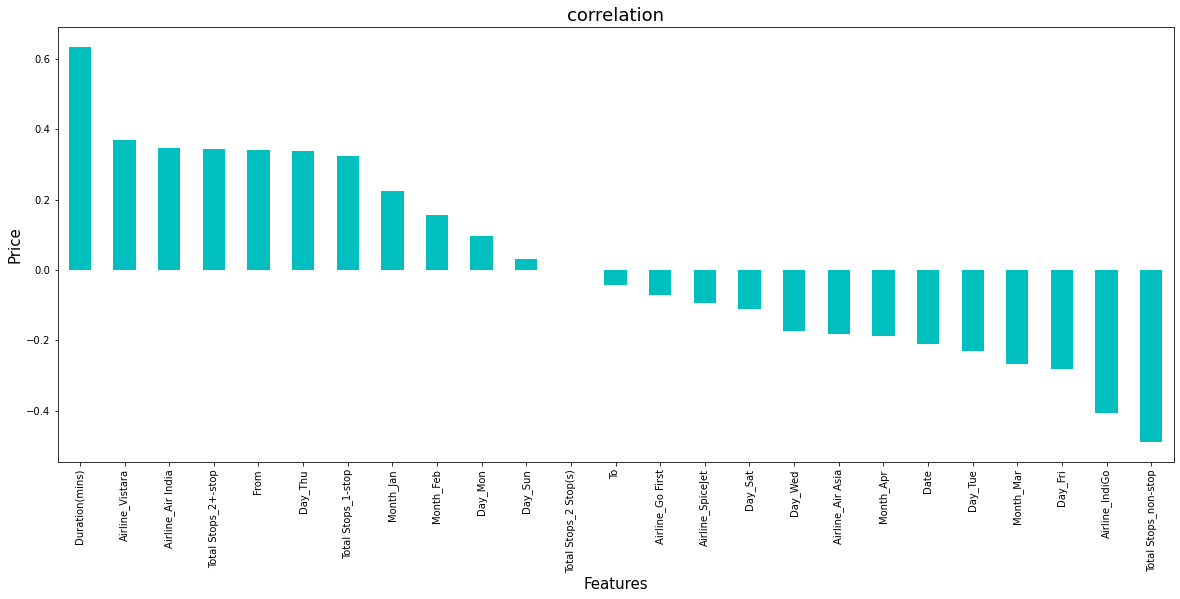

In [119]:
plt.figure(figsize = (20,8))
DF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Duration(mins), Airline_Vistara,Airline_Air India, Total Stops_2+stop, From and Day_Thur have the highest positive correlation with Price, while Total Stops_non-stop,Airline_IndiGo,Day_Fri,Month_Mar have the highest negative correlation with Price

### Feature Selection

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
X = DF.drop(columns = ['Price'])
y = DF['Price']

In [122]:
X

,From,To,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,15,14,11,-1.112940,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15,14,11,-1.075442,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,14,11,-1.075442,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,15,14,11,-1.039161,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,15,14,11,-1.151747,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,14,2,3,0.731719,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2374,14,2,3,1.442279,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2375,14,2,3,1.565576,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2376,14,2,3,1.619048,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [123]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
vif = pd.DataFrame()

In [126]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [127]:
vif

,Features,vif
0,From,1.380151
1,To,1.175036
2,Date,3.347864
3,Duration(mins),5.302687
4,Airline_Air Asia,inf
5,Airline_Air India,inf
6,Airline_Go First,inf
7,Airline_IndiGo,inf
8,Airline_SpiceJet,inf
9,Airline_Vistara,inf


MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped.

### Selecting Kbest Features

In [128]:
from sklearn.feature_selection import SelectKBest, f_classif

In [129]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [130]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(30,'Score'))

                  Feature       Score
0                    From  155.647369
1                      To   41.266296
11  Total Stops_2 Stop(s)   27.945246
19                Day_Tue   19.158709
17                Day_Sun   18.432447
6        Airline_Go First   16.933512
12    Total Stops_2+-stop   16.349064
18                Day_Thu   16.202912
3          Duration(mins)   14.564992
7          Airline_IndiGo   12.925715
23              Month_Jan   11.525641
24              Month_Mar   11.298818
8        Airline_SpiceJet   11.285328
13   Total Stops_non-stop   11.278850
10     Total Stops_1-stop   10.943729
4        Airline_Air Asia   10.618038
22              Month_Feb   10.502784
2                    Date    9.771634
9         Airline_Vistara    8.967795
15                Day_Mon    8.423255
20                Day_Wed    8.175334
14                Day_Fri    7.980255
5       Airline_Air India    7.752044
21              Month_Apr    7.703346
16                Day_Sat    7.360480


#### Selecting best features based on their scores:

In [131]:
x_best = X.drop(columns=['Day_Sat']).copy()

In [132]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.


## Regression Model Building

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [135]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9008463834516044 on random_state: 24


In [136]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =24)

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [138]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [139]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [140]:
models=[rf,dt,xg,SV,r]

In [141]:
for m in models:
    m.fit(x_train,y_train)
    m_pred=m.predict(x_test)
    R2=r2_score(y_test,m_pred)
    MSE=mean_squared_error(y_test,m_pred)
    RMSE=np.sqrt(MSE)
    CVS=cross_val_score(m,scaled_x_best,y,cv=ShuffleSplit(5)).mean()
    print(m,"results :")
    print("R2 Score :",R2)
    print("Cross Validation Score :",CVS)
    print("Mean Squared Error :",MSE)
    print("Root Mean Squared Error :",RMSE)
    print("\n")


RandomForestRegressor() results :
R2 Score : 0.9002717909950755
Cross Validation Score : 0.8894369514201905
Mean Squared Error : 1669352.4628051412
Root Mean Squared Error : 1292.0342343781535


DecisionTreeRegressor() results :
R2 Score : 0.7682890662292263
Cross Validation Score : 0.8428986854410832
Mean Squared Error : 3878613.902812792
Root Mean Squared Error : 1969.4196868145682


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameter = {'n_estimators':[30,60,80],'max_depth': [40,50,80],'min_samples_leaf':[5,10,20],'min_samples_split':[2,5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [144]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=ShuffleSplit(5),n_jobs = -1,verbose = 1)

In [145]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [40, 50, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [146]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

In [150]:
Best_mod = RandomForestRegressor(n_estimators = 30,criterion = 'mse', max_depth= 40, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 2)

Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=40, min_samples_leaf=5, n_estimators=30)

In [151]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

87.15436311972498


##### Random Forest Regressor has an accuracy of 87.15%

#### Saving The Model

In [152]:
import joblib
joblib.dump(Best_mod,"BestModelFlight.pkl")

['BestModelFlight.pkl']

#### Loading The Model

In [153]:
mod=joblib.load("BestModelFlight.pkl")

In [154]:
print(mod.predict(scaled_x_best))

[ 2466.30456013  2780.33491342  2812.14897066 ... 15039.26828285
 13548.02022826 11342.05215747]


In [155]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,2466.304560,2395
1,2780.334913,2395
2,2812.148971,2407
3,3065.649254,2407
4,2489.049192,2410
5,2448.446162,2410
6,2448.446162,2410
7,2448.446162,2410
8,2448.446162,2410
9,2448.446162,2410
